In [1]:
import requests
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt
import numpy as np

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from PIL import Image

In [2]:
# creates a Beautiful Soup object from the portolio website and converts it a string
url = 'https://JustinePile.github.io'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

text = soup.get_text()
string_output = str(text)

In [3]:
#set stopwords
stopwords = ['view', 'code', 'Justine', 'Pile', 'GitHub', 'created', 'using', 'file'] + list(STOPWORDS)

In [4]:
# create a mask
star_mask = np.array(Image.open('star.jpg'))
mask_colors = ImageColorGenerator(star_mask)

In [5]:
# instantiate a word cloud object
portfolio_wc = WordCloud(
    mask = star_mask,
    color_func = mask_colors,
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
portfolio_wc.generate(string_output)

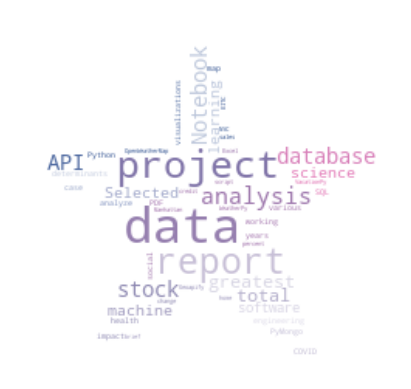

In [6]:
# display the word cloud
plt.imshow(portfolio_wc, interpolation='bilinear')
plt.axis('off')
plt.savefig("wordcloud_figure.png")
plt.show()